Classification and Regression Trees // ML Practice
----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Training a Basic Classification Tree on Tumor Data
----
Train a classification tree to predict whether a tumor is malignant or benign using two features: radius_mean and concave points_mean. The data is already split into training and testing sets, with `X_train` and `y_train` used for training, and `X_test` and `y_test` reserved for evaluation. Use a fixed random seed (SEED = 1) to ensure reproducibility. Fit the decision tree classifier to the training data and prepare it for evaluation on the test set.

Prepping Dataset

In [2]:
cancer_df = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\wbc.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer_data = cancer_df[['diagnosis', 'radius_mean', 'concave points_mean']]
cancer_data.head()

,diagnosis,radius_mean,concave points_mean
0,M,17.99,0.14710
1,M,20.57,0.07017
2,M,19.69,0.12790
3,M,11.42,0.10520
4,M,20.29,0.10430


In [4]:
cancer_dum = pd.get_dummies(cancer_data['diagnosis'], drop_first=True).astype(int)
cancer_dec = pd.concat([cancer_data, cancer_dum], axis=1)
cancer_dec.head()

,diagnosis,radius_mean,concave points_mean,M
0,M,17.99,0.14710,1
1,M,20.57,0.07017,1
2,M,19.69,0.12790,1
3,M,11.42,0.10520,1
4,M,20.29,0.10430,1


In [5]:
cancer_dec.drop('diagnosis', axis=1, inplace=True)
cancer_dec.head()

,radius_mean,concave points_mean,M
0,17.99,0.14710,1
1,20.57,0.07017,1
2,19.69,0.12790,1
3,11.42,0.10520,1
4,20.29,0.10430,1


In [6]:
X = cancer_dec.drop('M', axis=1).values
y = cancer_dec['M'].values

print(X.shape)
print(y.shape)

(569, 2)
(569,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=21, stratify = y)

In [8]:
#1. Import DecisionTreeClassifier from sklearn.tree.
from sklearn.tree import DecisionTreeClassifier

#2. Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.
dt = DecisionTreeClassifier(max_depth=6)

#3. Fit dt to the training set.
dt.fit(X_train, y_train)

#4. Predict the test set labels and assign the result to y_pred.
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 1 1 1 1]


**Task: Evaluating the Classification Tree Model**
---
Evaluate the performance of the trained decision tree model `dt` using the test dataset. Use the `X_test` feature matrix to generate predictions and compare them with the true labels in `y_test`. Calculate the accuracy score, which represents the proportion of correct predictions made by the model on the test set. This gives a quick assessment of how well the model generalizes to unseen data.


In [9]:
#1. Import the function accuracy_score from sklearn.metrics.
from sklearn.metrics import accuracy_score

#2. Predict the test set labels and assign the obtained array to y_pred.
y_pred = dt.predict(X_test)

#3. Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.
acc = accuracy_score(y_test, y_pred)
acc

0.9239766081871345

Comparing Logistic Regression and Classification Tree Decision Boundaries
----
Compare the behavior of a classification tree and a logistic regression model by visualizing their decision regions. Fit both models to the training data using `X_train` and `y_train`, then use the plot_labeled_decision_regions() function to display their decision boundaries side by side. Observe how the classification tree creates flexible, box-like regions while logistic regression draws a single straight line to separate the classes. This comparison helps highlight the differences in how both models partition the feature space.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X, y, models):
    for clf in models:
        # Pass the current model to mlxtend.plotting.plot_decision_regions()
        plot_decision_regions(np.array(X), np.array(y), clf=clf, legend=2)

        # Add labels to the axes
        plt.xlabel(X.columns[0])
        plt.ylabel(X.columns[1])

        # Set the title to be the name of the current classifier
        plt.title(str(clf).split('(')[0])

        # Show the plot
        plt.show()

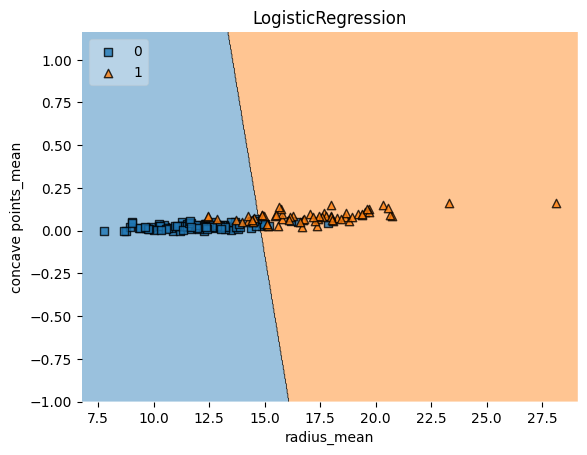

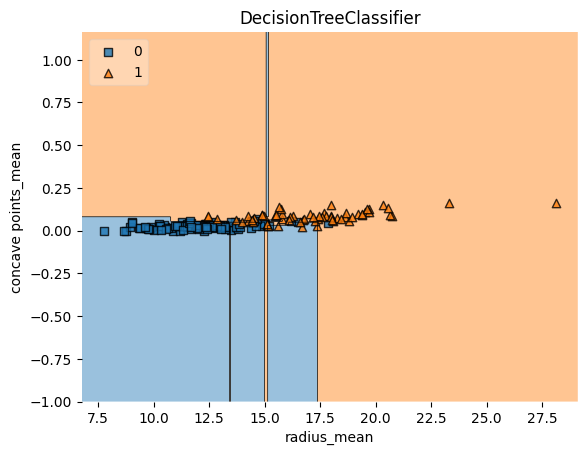

In [11]:
#1. Import LogisticRegression from sklearn.linear_model.
from sklearn.linear_model import LogisticRegression

#2. Instantiate a LogisticRegression model and assign it to logreg.
logreg = LogisticRegression()

#3. Fit logreg to the training set.
logreg.fit(X_train, y_train)

#4. Review the plot generated by plot_labeled_decision_regions().
clfs = [logreg, dt]

plot_labeled_decision_regions(pd.DataFrame(X_test, columns=['radius_mean', 'concave points_mean']), y_test, clfs)


Training a Classification Tree Using Entropy
----
Train a classification tree on the Wisconsin Breast Cancer dataset using entropy as the splitting criterion. Use all 30 available features in the dataset. Fit the model to the training data using X_train and y_train. Specifying entropy as the criterion will guide the tree to split based on information gain, helping it select the most informative features at each step.

In [15]:
#1. Import DecisionTreeClassifier from sklearn.tree.
from sklearn.tree import DecisionTreeClassifier

#2. Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.
#3. Set the information criterion to 'entropy'.
dt_entropy = DecisionTreeClassifier(max_depth = 8, criterion='entropy', random_state = 1)

#4. Fit dt_entropy on the training set.
dt_entropy.fit(X_train, y_train)

#Predict the test set labels of dt_entropy and assign the result to y_pred.
y_pred = dt_entropy.predict(X_test)

#. Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
accuracy_entropy = accuracy_score(y_test, y_pred)

Comparing Entropy and Gini Index in Classification Trees
----
Evaluate and compare the performance of two classification trees trained on the same dataset—one using entropy (`dt_entropy`) and the other using the Gini index (`dt_gini`) as the splitting criterion. Use the test data (`X_test` and `y_test`) to calculate the accuracy of dt_entropy. Then compare this result with accuracy_gini to see if there’s any noticeable difference in performance between the two criteria.

In [19]:
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion='gini', random_state = 1)

dt_gini.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

print('Accuracy Score For Gini Criterion:{:.3f}'.format(accuracy_gini))

print('Accuracy Score For Entropy Criterion:{:.3f}'.format(accuracy_entropy))


Accuracy Score For Gini Criterion:0.906
Accuracy Score For Entropy Criterion:0.883
